<a href="https://colab.research.google.com/github/Jihaad2021/Practical_TensorFlow/blob/main/01.ML_Basic_with_Keras/01_Basic_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

print(tf.__version__)

2.12.0


In [2]:
# Import the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

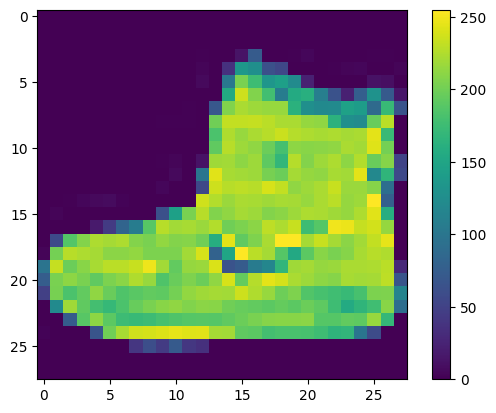

In [9]:
# Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False) 
plt.show()

In [10]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model
train_images = train_images/255.0 
test_images = test_images/255.0 

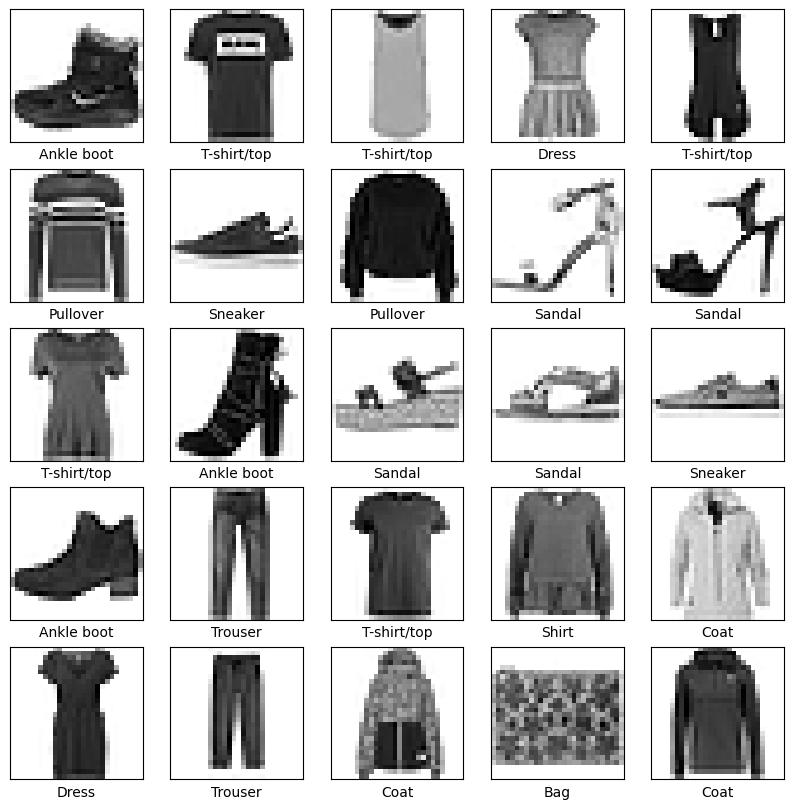

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1) 
  plt.xticks([])
  plt.yticks([])
  plt.grid(False) 
  plt.imshow(train_images[i], cmap=plt.cm.binary) 
  plt.xlabel(class_names[train_labels[i]]) 
plt.show()

In [13]:
## Building the model 

# set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
# compile the model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Train the model 
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5001 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3770 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3400 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3136 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2935 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2805 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2663 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2565 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2470 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.238

In [16]:
# evaluate accuracy 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3482 - accuracy: 0.8824 - 608ms/epoch - 2ms/step

Test accuracy: 0.8823999762535095


In [17]:
# Make Predictions 
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
predictions[0]

array([1.12875084e-10, 4.66768360e-11, 9.62926093e-12, 2.96537739e-10,
       1.24791774e-10, 4.96711573e-06, 2.89777056e-08, 2.46009813e-03,
       4.03315994e-08, 9.97534931e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [26]:
# graph this to look the full of 10 class predictions

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array) 
  if predicted_label == true_label: 
    color = 'blue'
  else: 
    color = 'red' 
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label],
                                       color=color))
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array) 

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")


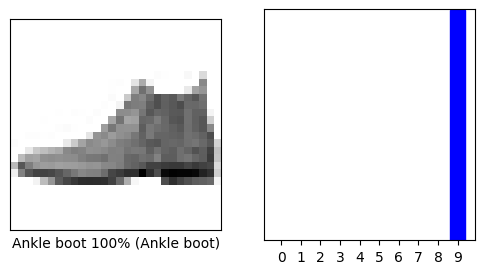

In [27]:
# verify predictions 
i = 0 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

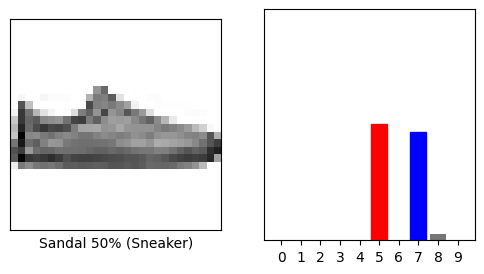

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

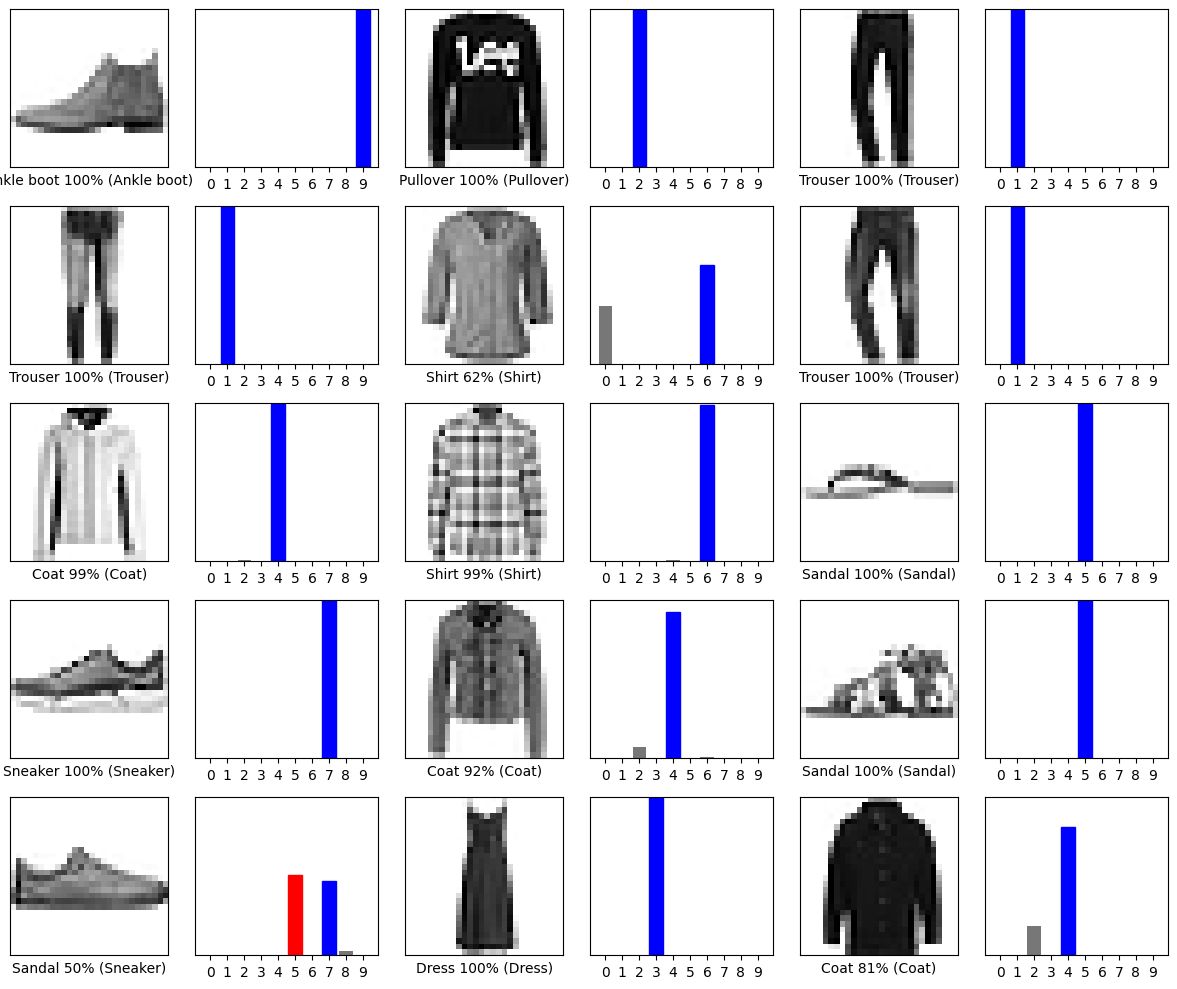

In [29]:
num_rows = 5
num_cols = 3 
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images) 
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels) 
plt.tight_layout()
plt.show()

In [30]:
# use the trained model 
img = test_images[1]
print(img.shape)

(28, 28)


In [31]:
img = (np.expand_dims(img,0)) 
print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = probability_model.predict(img) 
print(predictions_single)

1/1 [==============================] - 0s 60ms/step
[[9.1437119e-05 4.4296492e-13 9.9857044e-01 1.3172279e-08 4.7033670e-04
  8.3373802e-10 8.6779351e-04 3.0254848e-14 6.2578587e-10 1.9225312e-11]]


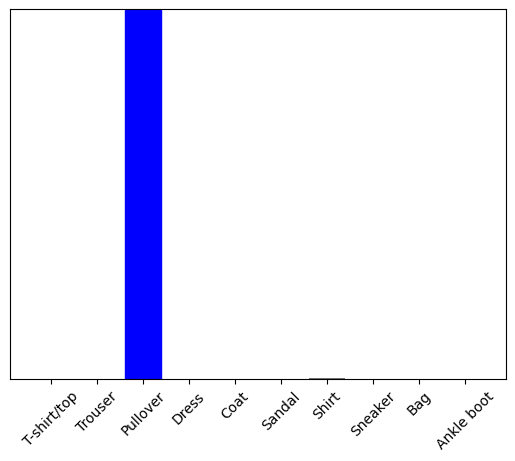

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [34]:
np.argmax(predictions_single[0])

2